# iris flower detection

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris

In [16]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns = iris.feature_names)
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


#### Basic Info about data

In [17]:
df["species"] = iris.target
df["species"] = df["species"].map({0:"setosa",1:"versicolor",2:"virginica"})
print("shape od data",df.shape)
df.head()

shape od data (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [19]:
print("datatypes",df.dtypes)

datatypes sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object


In [20]:
print("Null values",df.isnull().sum())

Null values sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


#### summary stat

In [21]:
print("summary stat",df.describe())

summary stat        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


# class destribution

In [22]:
print("species_destribution",df["species"].value_counts())

species_destribution species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


# Co-relation matrix

In [23]:
print("co-relation matrix:\n",df.select_dtypes(include = "number").corr())

co-relation matrix:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


In [24]:
print(df.select_dtypes(include = "number").corr().T)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


# pair plot (seaborn)

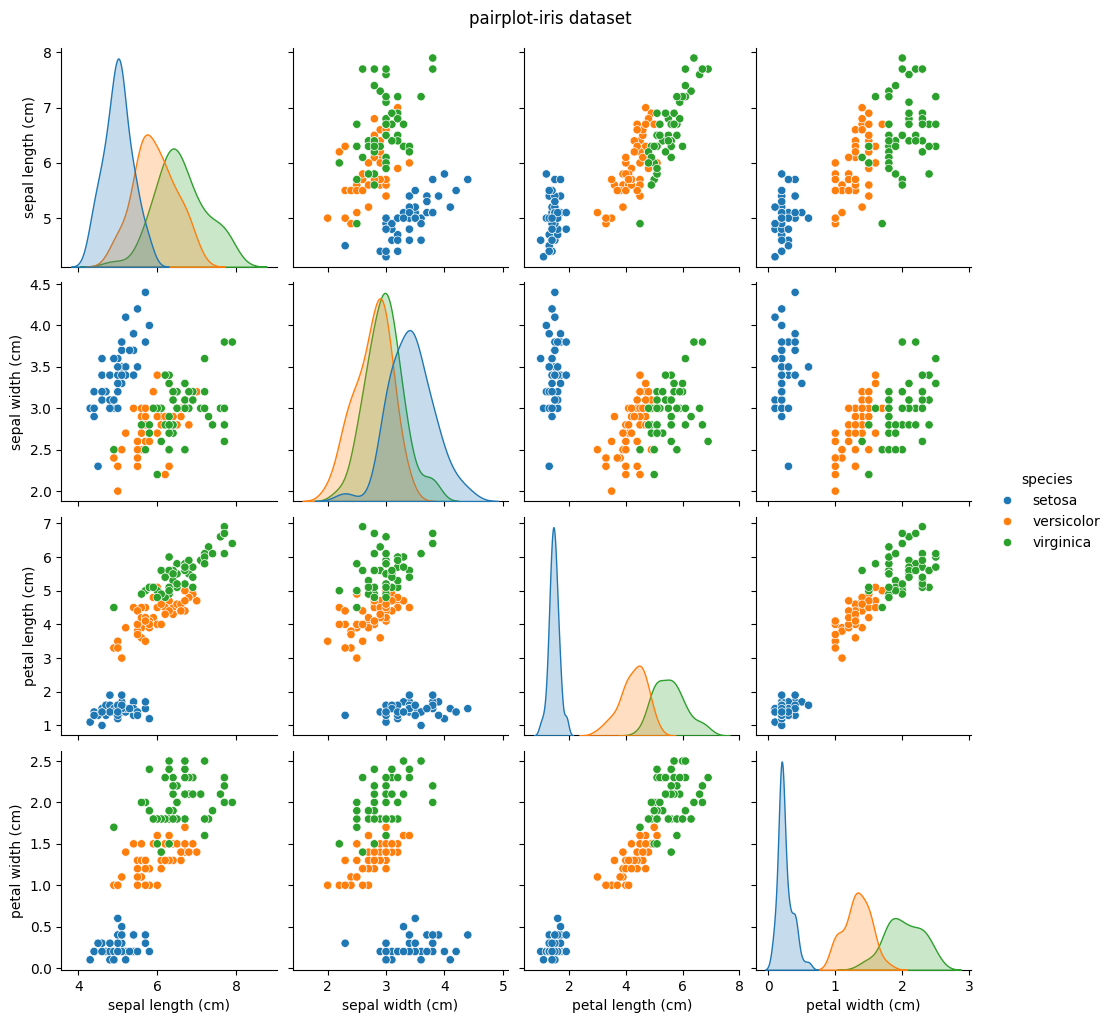

In [25]:
sns.pairplot(df,hue = "species",diag_kind = "kde")
plt.suptitle("pairplot-iris dataset",y = 1.02)
plt.show()

# box plot for each feature

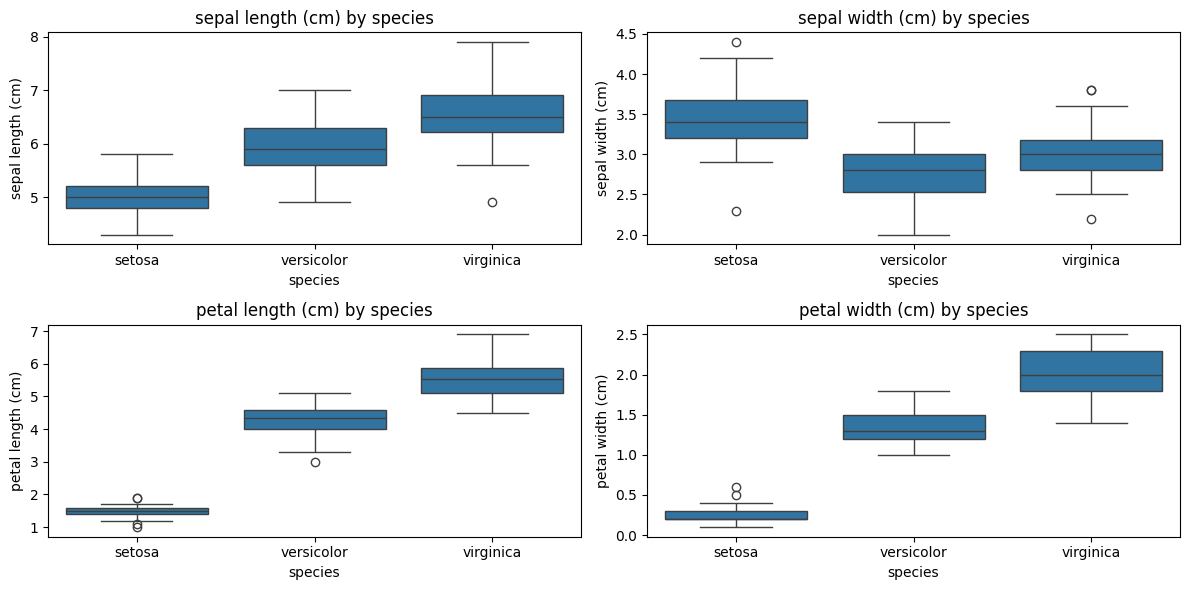

In [26]:
plt.figure(figsize = (12,6))
for i,col in enumerate(df.columns[:-1]):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = "species",y =col,data=df)
    plt.title(f"{col} by species")
plt.tight_layout()
plt.show()

# co relation heat map

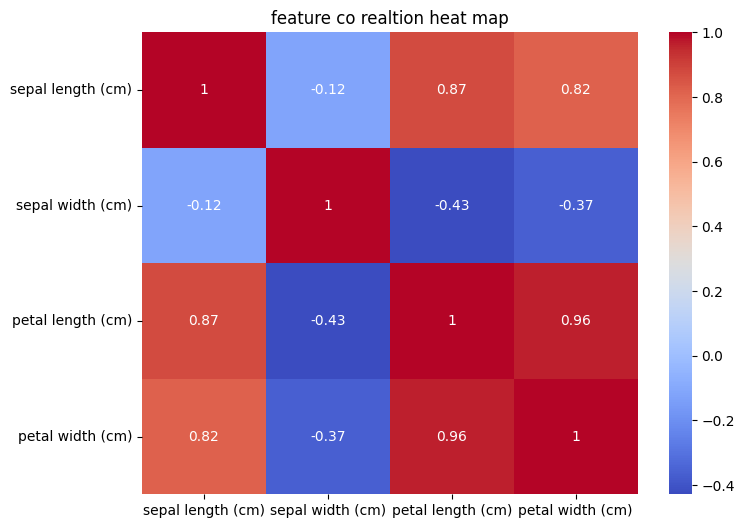

In [27]:
plt.figure(figsize = (8,6))
sns.heatmap(df.select_dtypes(include= "number").corr(),annot = True,cmap = "coolwarm")
plt.title("feature co realtion heat map")
plt.show()